<a href="https://colab.research.google.com/github/JavZon/Regression-Algorithms/blob/main/MLR_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [2]:
housing=df[df['district']=='Чиланзарский']
print(housing.shape)
housing.head()

(1616, 6)


,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [3]:
housing.drop(columns='district', inplace=True)
housing.head()

<ipython-input-3-09a68d9b9b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.drop(columns='district', inplace=True)


,rooms,size,level,max_levels,price
2,2,42.0,4,4,37000.0
3,3,65.0,1,4,49500.0
4,3,70.0,3,5,55000.0
5,1,28.0,1,4,25500.0
6,1,30.0,2,4,21200.0


In [4]:
housing.isnull().sum()

rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

**Correlation**

In [5]:
housing.corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.868771,0.265235,0.279517,0.703835
size,0.868771,1.000000,0.306221,0.444404,0.843639
level,0.265235,0.306221,1.000000,0.548681,0.138780
max_levels,0.279517,0.444404,0.548681,1.000000,0.340015
price,0.703835,0.843639,0.138780,0.340015,1.000000


In [6]:
housing.corrwith(housing['price']).sort_values(ascending=False)

price         1.000000
size          0.843639
rooms         0.703835
max_levels    0.340015
level         0.138780
dtype: float64

**Vizualization**

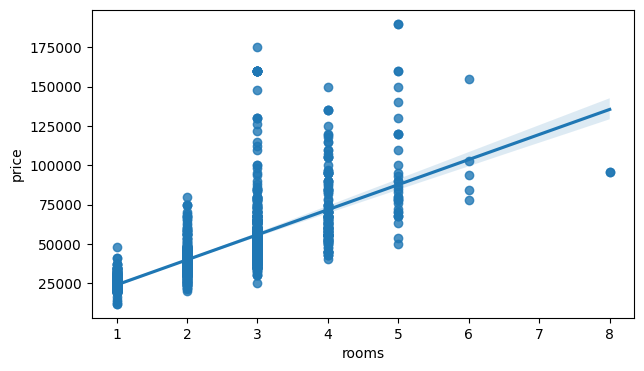

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,4))
sns.regplot(data=housing, x='rooms', y='price')
plt.show()

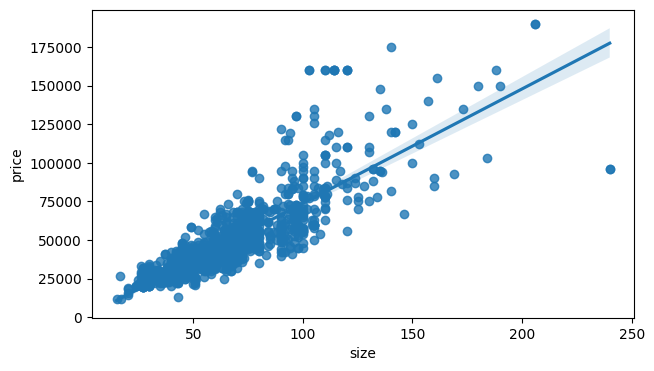

In [8]:
plt.figure(figsize=(7,4))
sns.regplot(data=housing, x='size', y='price')
plt.show()

<Figure size 1000x600 with 0 Axes>

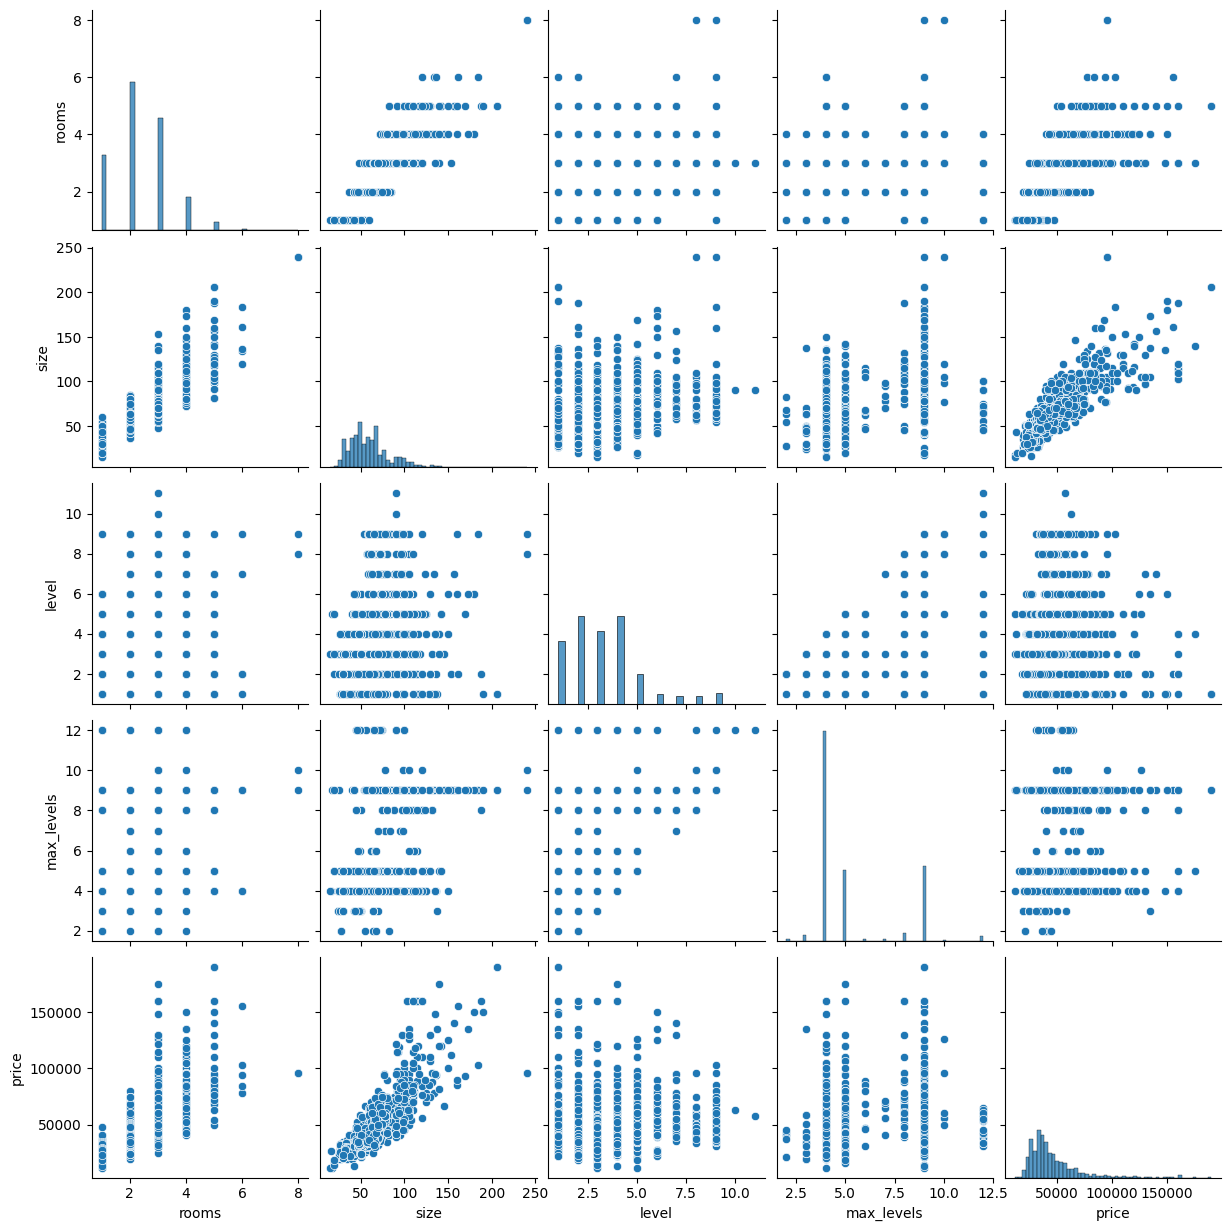

In [9]:
plt.figure(figsize=(10,6))
sns.pairplot(data=housing[['rooms','size','level','max_levels','price']])
plt.show()

We split our dataset using **train_test_split**

In [10]:

from sklearn.model_selection import train_test_split
X=housing.drop(columns='price')
Y=housing['price'].copy()
X_train, X_test, y_train_label, y_test_label=train_test_split(X, Y, test_size=0.10, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train_label.shape)
print(y_test_label.shape)

(1454, 4)
(162, 4)
(1454,)
(162,)


**ML**

In [11]:
from sklearn.linear_model import LinearRegression
MLR_model=LinearRegression()
MLR_model.fit(X_train, y_train_label)

LinearRegression()

In [12]:
print("Coef : ", MLR_model.coef_)
print("Intercept : ", MLR_model.intercept_)

Coef :  [-3010.03748405   862.9397714  -1555.84111641   148.01175648]
Intercept :  3458.3511823337685


**Multicollinearity**

**Size and Price:**

There is a strong positive correlation between the size of the house and its price. Larger houses tend to be more expensive.

The regression coefficient for size is also high, indicating that size is a significant predictor of price.

**Rooms and Price:**

While there is a positive correlation between the number of rooms and price, it is not as strong as the correlation between size and price.

The regression coefficient for rooms might appear smaller or even negative when size is included in the model.

**Multicollinearity Explanation**

**Size vs Rooms:**

**Size:** Represents the total land area of the house.

**Rooms:** Represents the number of rooms, which is inherently connected to the size of the house. In a 50 square meter house, the number of rooms is limited by the total size.

**Interconnected Predictors:**

Since rooms are built within the given land size, the size of the house contains significant information about the number of rooms.
This leads to high multicollinearity because the predictors (size and rooms) are not independent of each other. They share much of the same information.

**Effect on Regression Coefficients:**

When we include both size and rooms in the regression model, the effect of rooms might appear diminished because the size already captures most of the variation in price related to the house's physical space.
This can lead to misleading coefficients for rooms, even though it is an important factor.

In [15]:
y_test_pred=MLR_model.predict(X_test)
y_test_pred[:5]

array([38405.70642997, 33356.36655605, 28994.51026168, 46843.03904765,
       33228.06780159])

**Model Evaluation**

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae=mean_absolute_error(y_test_label, y_test_pred)
print("MAE : ", mae)
mse=mean_squared_error(y_test_label, y_test_pred)
print("RMSE :", np.sqrt(mse))

MAE :  7409.794634553287
RMSE : 12249.735537524299


**Variance inflation factor**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your dataframe with predictors
X2 = housing[['size', 'rooms', 'max_levels', 'level']]
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(len(X2.columns))]

print(vif_data)

      feature        VIF
0        size  33.515416
1       rooms  26.284291
2  max_levels  10.172228
3       level   5.854052
